<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#이 세개는 항상 세트

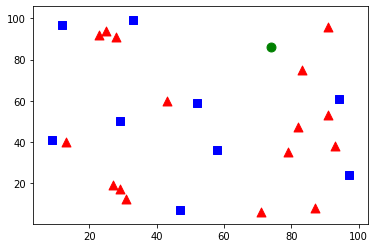

In [7]:
trainData = np.random.randint(0,100,(25,2)).astype(np.float32)

labels = np.random.randint(0,2,(25,1))

red = trainData[labels.flatten() == 0]
blue = trainData[labels.flatten() == 1]

plt.scatter(red[:,0], red[:,1], 80, 'r', '^')#삼각형
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')#사각형

new_instance = np.random.randint(0,100, (1,2)).astype(np.float32)
plt.scatter(new_instance[:,0], new_instance[:,1], 80, 'g', 'o')#원형


ret:0.0
ret:0.0, results:[[0.]], dist:[[ 202.  389. 1025. 1213. 1378.]]


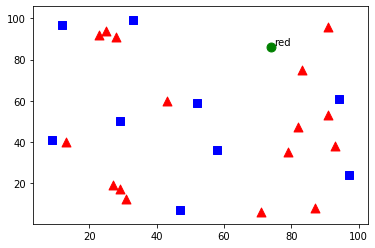

In [8]:
knn = cv2.ml.KNearest_create()
knn.train(trainData, cv2.ml.ROW_SAMPLE, labels)

K = 5#갯수
ret = knn.predict(new_instance, K)
print('ret:{}'.format(ret[0]))

ret, results, neighbors, dist = knn.findNearest(new_instance, K)
print('ret:{}, results:{}, dist:{}'.format(ret, results, dist))

plt.scatter(red[:,0], red[:,1], 80, 'r', '^')
plt.scatter(blue[:,0], blue[:,1], 80, 'b', 's')
plt.scatter(new_instance[:,0], new_instance[:,1], 80, 'g', 'o')
plt.annotate('red' if ret == 0.0 else 'blue', xy=new_instance[0], xytext=(new_instance[0]+1))
plt.show()

In [0]:
new_instance

array([[22., 32.]], dtype=float32)

In [0]:
new_instance[0]

array([22., 32.], dtype=float32)

In [0]:
from google.colab import files
uploaded = files.upload()

Saving digits.png to digits.png


In [0]:
import numpy as np, cv2

data = None  # 이미지 데이타 셋 
k = list(range(10)) # [0,1,2,3,4,5,6,7,8,9] 레이블 셋

# 이미지 데이타 읽어들이는 함수 ---①
def load():
    global data
    # 0~9 각각 500(5x100)개, 총5000(50x100)개, 한 숫자당 400(20x20)픽셀
    image = cv2.imread('./digits.png')
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # 숫자 한개(20x20)씩 구분하기 위해 행별(50)로 나누고 열별(100)로 나누기
    cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
    # 리스트를 NumPy 배열로  변환 (50 x 100 x 20 x 20 )
    data = np.array(cells)

# 모든 숫자 데이타 반환 ---②
def getData(reshape=True):
    if data is None: load() # 이미지 읽기 확인
    # 모든 데이타를 N x 400 형태로 변환
    if reshape:
        full = data.reshape(-1, 400).astype(np.float32) # 5000x400
    else:
        full = data
    labels = np.repeat(k,500).reshape(-1,1)  # 각 숫자당 500번 반복(10x500)
    return (full, labels)

# 훈련용 데이타 반환 ---③
def getTrain(reshape=True):
    if data is None: load() # 이미지 읽기 확인
    # 50x100 중에 90열만 훈련 데이타로 사용
    train = data[:,:90]
    if reshape:
        # 훈련 데이타를 N X 400으로 변환
        train = train.reshape(-1,400).astype(np.float32) # 4500x400
    # 레이블 생성
    train_labels = np.repeat(k,450).reshape(-1,1) # 각 숫자당 45번 반복(10x450)
    return (train, train_labels)

# 테스트용 데이타 반환 ---④
def getTest(reshape=True):
    if data is None: load()
    # 50x100 중에 마지막 10열만 훈련 데이타로 사용
    test = data[:,90:100]
    # 테스트 데이타를 N x 400으로 변환
    if reshape:
        test = test.reshape(-1,400).astype(np.float32) # 500x400
    test_labels = np.repeat(k,50).reshape(-1,1)
    return (test, test_labels)


# 손글씨 숫자 한 개를 20x20 로 변환후에 1x400 형태로 변환 ---⑤
def digit2data(src, reshape=True):
    h, w = src.shape[:2]
    square = src
    # 정사각형 형태로 만들기
    if h > w:
        pad = (h - w)//2
        square = np.zeros((h, h), dtype=np.uint8)
        square[:, pad:pad+w] = src
    elif w > h :
        pad = (w - h)//2
        square = np.zeros((w, w), dtype=np.uint8)
        square[pad:pad+h, :] = src
    # 0으로 채워진 20x20 이미지 생성
    px20 = np.zeros((20,20), np.uint8)
    # 원본을 16x16으로 축소해서 테두리 2픽셀 확보
    px20[2:18, 2:18] = cv2.resize(square, (16,16), interpolation=cv2.INTER_AREA)
    if reshape:
        # 1x400형태로 변환
        px20 = px20.reshape((1,400)).astype(np.float32)
    return px20


In [0]:
train, train_labels = getTrain()
test, test_labels = getTest()

knn = cv2.ml.KNearest_create()
knn.train(train, cv2.ml.ROW_SAMPLE, train_labels)

for k in range (1,11):
  ret, result, neighbors, distance = knn.findNearest(test, k=k)

  correct = np.sum(result == test_labels)
  accuracy = correct/result.size * 100.
  print('k={}, Accuracy: {:.2f} {:d}/{:d}'.format(k,accuracy,correct,result.size))

k=1, Accuracy: 95.40 477/500
k=2, Accuracy: 94.40 472/500
k=3, Accuracy: 95.00 475/500
k=4, Accuracy: 94.40 472/500
k=5, Accuracy: 94.20 471/500
k=6, Accuracy: 94.20 471/500
k=7, Accuracy: 94.40 472/500
k=8, Accuracy: 93.60 468/500
k=9, Accuracy: 93.40 467/500
k=10, Accuracy: 93.00 465/500
